In [1]:
#follows https://github.com/TheAIDojo/AI-for-Climate-Change
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import model_selection, preprocessing

In [2]:
uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"

# download and extract dataset file
tf.keras.utils.get_file(
    origin=uri,
    fname="jena_climate_2009_2016.csv.zip",
    extract=True,
    cache_dir=".",
    cache_subdir="",
)

'.\\jena_climate_2009_2016.csv.zip'

In [3]:
# read dataset from CSV using Pandas
df = pd.read_csv("jena_climate_2009_2016.csv")
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
# let's create a human readable table of the features and their titles

key_title_dictionary = {
    "p (mbar)": "Pressure",
    "T (degC)": "Temperature",
    "Tpot (K)": "Temperature in Kelvin",
    "Tdew (degC)": "Temperature (dew point)",
    "rh (%)": "Relative Humidity",
    "VPmax (mbar)": "Saturation vapor pressure",
    "VPact (mbar)": "Vapor pressure",
    "VPdef (mbar)": "Vapor pressure deficit",
    "sh (g/kg)": "Specific humidity",
    "H2OC (mmol/mol)": "Water vapor concentration",
    "rho (g/m**3)": "Airtight",
    "wv (m/s)": "Wind speed",
    "max. wv (m/s)": "Maximum wind speed",
    "wd (deg)": "Wind direction in degrees",
}

pd.DataFrame.from_dict(key_title_dictionary, orient="index", columns=["Title"])

,Title
p (mbar),Pressure
T (degC),Temperature
Tpot (K),Temperature in Kelvin
Tdew (degC),Temperature (dew point)
rh (%),Relative Humidity
VPmax (mbar),Saturation vapor pressure
VPact (mbar),Vapor pressure
VPdef (mbar),Vapor pressure deficit
sh (g/kg),Specific humidity
H2OC (mmol/mol),Water vapor concentration


In [5]:
# check for missing values
df.isna().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


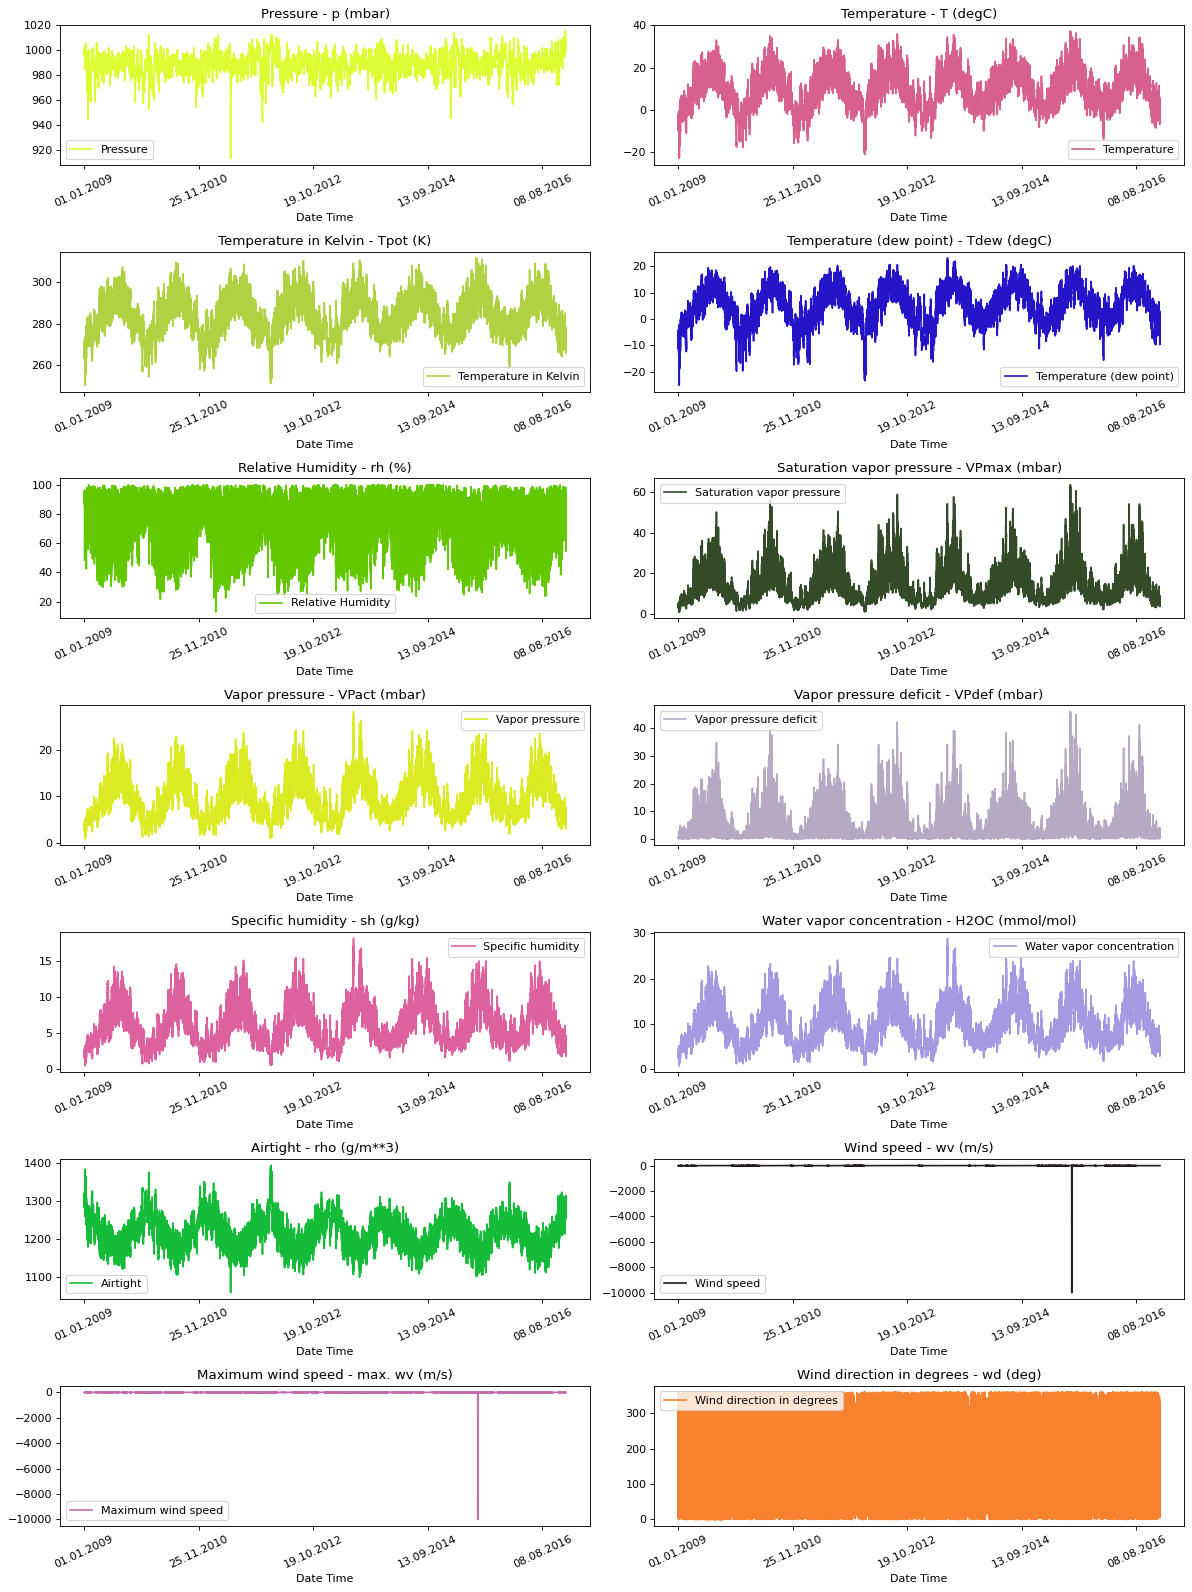

In [7]:
# visualize the data

time_data = df["Date Time"].str.slice(
    start=0, stop=10
)  # slice the date from the datetime string

fig, axes = plt.subplots(
    nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
)  # create a 7x2 grid of subplots

for i, key in enumerate(key_title_dictionary.keys()):  # iterate over the features
    c = np.random.rand(
        3,
    )  # generate a random color for each feature
    t_data = df[key]  # get the feature data
    t_data.index = time_data  # set the index to the formatted date
    t_data.head()  # show the first 5 rows of the data
    ax = t_data.plot(
        ax=axes[i // 2, i % 2],
        color=c,
        title="{} - {}".format(key_title_dictionary[key], key),
        rot=25,
    )  # plot the data on the subplot
    ax.legend([key_title_dictionary[key]])  # add a legend to the subplot

plt.tight_layout()  # adjust the subplots to fit the figure area

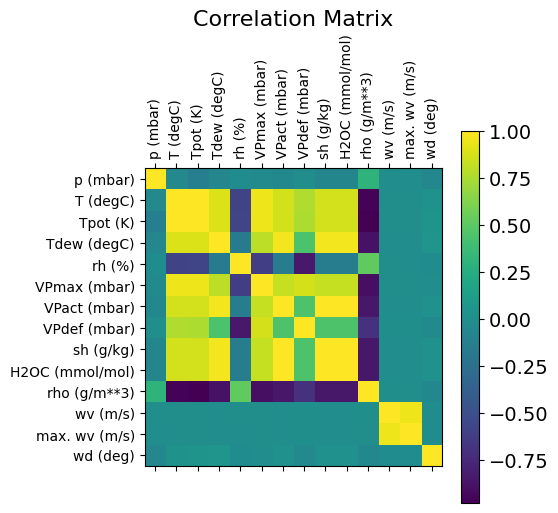

In [8]:

# This heat map shows the correlation between different features.
# we need for remove the date time column
df_corr=df.drop('Date Time', axis=1)
plt.matshow(df_corr.corr())
plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr.columns)), df_corr.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [9]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [10]:
# hyperparameters

train_fraction = 0.7  # fraction of the dataset to use for training
train_split = int(train_fraction * int(df.shape[0]))  # split index

rph = 6  # records per hour
past = 720  # past 5 days (rph * 24 * 5)
future = 72  # next 12 hours (rph * 12)
batch_size = 256  # batch size

In [11]:
# put columns names that we intend to use in a list for easy reference
selected_columns = [
    "p (mbar)",
    "T (degC)",
    "VPmax (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "rho (g/m**3)",
    "wv (m/s)",
]

# create a new dataframe with only the selected columns
dataset_df = df[selected_columns]
dataset_df

,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
0,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
1,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
2,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
3,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
4,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32
...,...,...,...,...,...,...,...
420546,1000.07,-4.05,4.52,1.22,2.06,1292.98,0.67
420547,999.93,-3.35,4.77,1.44,2.07,1289.44,1.14
420548,999.82,-3.16,4.84,1.55,2.05,1288.39,1.08
420549,999.81,-4.23,4.46,1.26,1.99,1293.56,1.49


In [12]:
# standardize the data using StandardScaler from sklearn.preprocessing

scaler = preprocessing.StandardScaler()  # create a scaler object
scaler.fit(dataset_df)  # fit the scaler to the dataset

dataset_df = scaler.transform(dataset_df)  # transform the dataset

dataset_df = pd.DataFrame(
    dataset_df, columns=selected_columns
)  # convert the dataset to a dataframe
dataset_df.describe().transpose()  # show the dataset statistics

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,5.622396e-14,1.000001,-9.046245,-0.599724,0.043934,0.658879,3.127034
T (degC),420551.0,1.124566e-16,1.000001,-3.853589,-0.723007,-0.003579,0.714662,3.303892
VPmax (mbar),420551.0,2.595152e-16,1.000001,-1.631507,-0.748965,-0.226935,0.519931,6.485809
VPdef (mbar),420551.0,6.487879e-17,1.000001,-0.825513,-0.647848,-0.378287,0.256816,8.570332
sh (g/kg),420551.0,-5.406566e-16,1.000001,-2.079114,-0.791529,-0.162796,0.669240,4.558348
rho (g/m**3),420551.0,5.297353e-15,1.000001,-3.917752,-0.714763,-0.056854,0.668096,4.439688
wv (m/s),420551.0,9.968356e-19,1.000001,-152.806971,-0.010883,0.000883,0.017690,0.409307


In [13]:
# split data into train and test sets using the train_split index

train_data = dataset_df.loc[0 : train_split - 1]
test_data = dataset_df.loc[train_split:]

dataset_df.shape, train_data.shape, test_data.shape

((420551, 7), (294385, 7), (126166, 7))

In [14]:
# let's create x_train and y_train

x_train = train_data.values  # all training timesteps from 0 to train_split

y_train_start = past + future  # first target index = past + future (720 + 72 = 792)
y_train_end = (
    y_train_start + train_split
)  # last target index = start + train_split (792 + train_split)

# all targets from 792 to train_split + 792
y_train = dataset_df.iloc[y_train_start:y_train_end][
    ["T (degC)"]
].values  # note that we only select the "T (degC)" column as the target since we are trying to predict temperature

x_train.shape, y_train.shape

((294385, 7), (294385, 1))

In [15]:
# now create x_test and y_test

# specify the end of the x_test data by accounting for the past and future timesteps that will be used for the target (y)
x_test_end = (
    len(test_data) - future - past
)  # last x_test index = len(dataset_df) - future - past ( - 72 - 720 = 419759)

x_test = test_data.iloc[:x_test_end].values  # pick up from where y_train left off

# specify the start of the y_test data by accounting for the past and future timesteps that will be used for the target (y)
y_start = train_split + past + future  # first target index = train_split + 720 + 72

y_test = dataset_df.iloc[y_start:][
    ["T (degC)"]
].values  # note that we only select the "T (degC)" column as the target since we are trying to predict temperature

x_test.shape, y_test.shape

((125374, 7), (125374, 1))

In [16]:
sampling_rate = rph  # sample every hour
sequence_length = int(
    past / rph
)  # number of timestamps to use for each training sample

train_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

test_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

In [17]:
# preview train_dataset, including total size and sample input/output
for batch in train_dataset.take(1):
    print("Input shape:", batch[0].shape)
    print("Output shape:", batch[1].shape)

# print total size of dataset
print("Total size of dataset:", len(train_dataset))

Input shape: (256, 120, 7)
Output shape: (256, 1)
Total size of dataset: 1148


In [18]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.LSTM(
            32, input_shape=(sequence_length, len(selected_columns))
        ),  # input shape is sequence_length (720) x number of features (7)
        tf.keras.layers.Dense(1),
    ]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.Huber(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()],
)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    "model_checkpoint.h5",
    save_best_only=True,
    monitor="val_loss",
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True,
)

model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset,
    callbacks=[checkpoint_callback, early_stopping_callback],
)

Epoch 1/10
1148/1148 [==============================] - 143s 124ms/step - loss: 0.1069 - mean_absolute_error: 0.3529 - val_loss: 0.0727 - val_mean_absolute_error: 0.3004
Epoch 2/10
   1/1148 [..............................] - ETA: 2:21 - loss: 0.5589 - mean_absolute_error: 0.9660

C:\Users\HendrikHamann\anaconda3\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1148/1148 [==============================] - 140s 122ms/step - loss: 0.0643 - mean_absolute_error: 0.2792 - val_loss: 0.0765 - val_mean_absolute_error: 0.3086
Epoch 3/10
1148/1148 [==============================] - 132s 115ms/step - loss: 0.0611 - mean_absolute_error: 0.2723 - val_loss: 0.0747 - val_mean_absolute_error: 0.3047
Epoch 4/10
1148/1148 [==============================] - 133s 116ms/step - loss: 0.0595 - mean_absolute_error: 0.2689 - val_loss: 0.0754 - val_mean_absolute_error: 0.3061


10/10 [==============================] - 1s 36ms/step


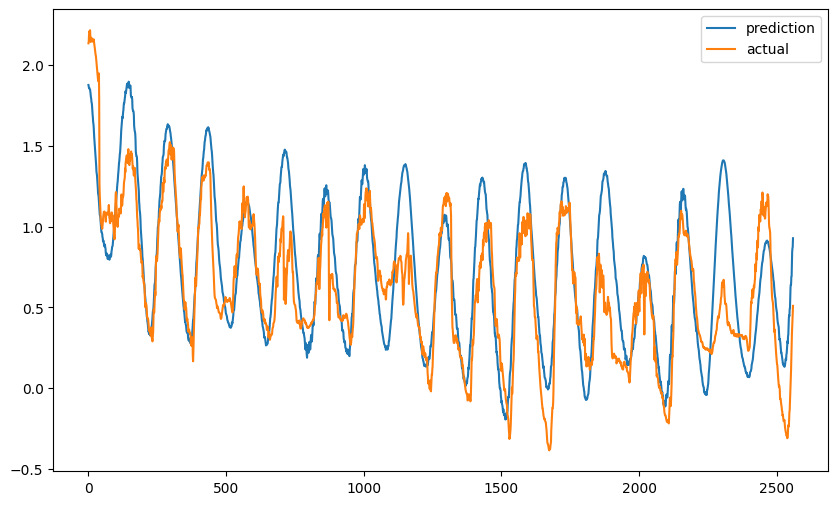

In [19]:
test_dataset_subset = test_dataset.take(
    10
)  # take the first 5 batches of the test dataset

# get the predictions for the test samples
predictions = model.predict(test_dataset_subset)

# get the actual values for the test samples
actual_values = []
for batch in test_dataset_subset:
    actual_values.extend(batch[1])  # batch[1] is the target value (y)

# plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(predictions, label="prediction")
plt.plot(actual_values, label="actual")
plt.legend()
plt.show()

In [1]:
720*3

2160